# Checkpoint 13: Search for heavy resonances decaying into vector boson pairs at ATLAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1:

Open the three background and one signal CSV files, and feed the data into four pandas.core.frame.DataFrame objects. One of them is significantly larger than others, and it will take much longer to unpack. You may want to use command os.path.getsize as a warning to your reader/self.
Carry out the usual sanity checks (pandas.core.frame.DataFrame.head(5)), and determine if data-cleaning is necessary pandas.core.frame.DataFrame.dropna(inplace = True)).

In [2]:
# importing data and reading it as dataframes; the zjets data is larger and therefore takes more time to process
dibos = pd.read_csv("Diboson.csv", index_col=0)
ggH1000 = pd.read_csv("ggH1000.csv", index_col=0)
top = pd.read_csv("Top.csv", index_col=0)

In [3]:
zjets = pd.read_csv("Zjets.csv", index_col=0)

In [4]:
dibos.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [5]:
ggH1000.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [6]:
top.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [7]:
zjets.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


In [8]:
# testing for null values in all dataframes
df_list = [dibos, ggH1000, top, zjets]
df_names = ['Diboson', 'ggH1000', 'Top', 'Zjets']
list_count = 0

for df in df_list:
    null_vals = df.isnull()
    count = 0

    for column, value in null_vals.items():
        if value is True:
            count += 1

    print("There are ", count, "null values in the", df_names[list_count], "dataframe")
    list_count += 1

There are  0 null values in the Diboson dataframe
There are  0 null values in the ggH1000 dataframe
There are  0 null values in the Top dataframe
There are  0 null values in the Zjets dataframe


Plot 1D distributions for the first 9 variables listed in Table 1, with one plot per variable and the distributions categorised by physics process (1 category for signal, 3 categories for background). Make sure the distributions are normalised (i.e. we are interested in shape differences here, not the overall integrated contributions), and that they are clearly distinct for the different processes (e.g. use different colours and non-filled histograms). You can use a loop over the input features to simplify the code, and you can ignore the units on the x-axis.

__Table 1: Variables__  
lep1_pt | transverse momentum of first reconstructed lepton (in MeV/c)  
lep2_pt | transverse momentum of second reconstructed lepton (in MeV/c)  
fatjet_pt | transverse momentum of reconstructed fat-jet (in MeV/c)  
fatjet_eta | η of reconstructed fat-jet  
fatjet_D2 | D2 of reconstructed fat-jet  
Zll_mass | invariant mass of reconstructed dilepton system (in MeV/c^2)  
Zll_pt | transverse momentum of reconstructed dilepton system (in MeV/c)  
MET | transverse missing energy in reconstructed event (in MeV)  
reco_zv_mass | invariant mass of reconstructed dilepton-plus-fatjet (ll J) system (in MeV/c^2)  
isSignal | boolean flag: 0 for background, 1 for signal

In [9]:
from sklearn.preprocessing import MaxAbsScaler

In [10]:
# trying out the scaler on the diboson dataframe
scaler = MaxAbsScaler()
dibos_scaled = scaler.fit_transform(dibos.to_numpy())
dibos_scaled = pd.DataFrame(dibos_scaled, columns=dibos.columns, index=dibos.index)
dibos_scaled.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.006051,0.001491,0.0,0.118589,0.013060,0.248810,0.005106,0.071511,-0.000796,0.609394,...,0.670946,-0.428719,0.012898,0.008217,1.0,-0.274548,-0.767813,0.015080,0.083161,-2.048236e-07
1,0.002692,0.008027,0.0,0.008288,0.001794,0.527547,0.006561,0.072414,-0.533470,-0.046299,...,-0.822901,0.947249,0.001291,0.023663,-1.0,-0.608288,0.897437,0.022545,0.019701,-2.048236e-07
2,0.005802,0.001504,0.0,0.053442,0.005366,0.100169,0.009603,0.069955,0.352414,-0.896515,...,-0.114365,-0.026789,0.005128,0.016654,-1.0,0.296414,0.374899,0.029556,0.038639,-2.048236e-07
3,0.004841,0.001520,1.0,0.048143,0.003580,0.229067,0.002008,0.096475,0.047773,0.322149,...,-0.064249,-0.809803,0.003829,0.015088,1.0,-0.658930,0.356660,0.012795,0.040625,-2.048236e-07
4,0.003168,0.002507,0.0,0.054466,0.004950,0.105602,0.010385,0.161888,-0.914201,-0.766140,...,-0.199633,0.136837,0.005287,0.009507,-1.0,-0.068677,0.890299,0.021407,0.040897,-2.048236e-07


In [11]:
# scaling other dataframes
ggH1000_scaled = scaler.fit_transform(ggH1000.to_numpy())
ggH1000_scaled = pd.DataFrame(ggH1000_scaled, columns=ggH1000.columns, index=ggH1000.index)

top_scaled = scaler.fit_transform(top.to_numpy())
top_scaled = pd.DataFrame(top_scaled, columns=top.columns, index=top.index)

zjets_scaled = scaler.fit_transform(zjets.to_numpy())
zjets_scaled = pd.DataFrame(zjets_scaled, columns=zjets.columns, index=zjets.index)

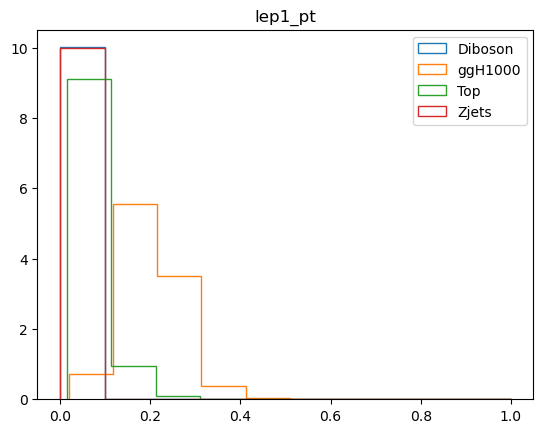

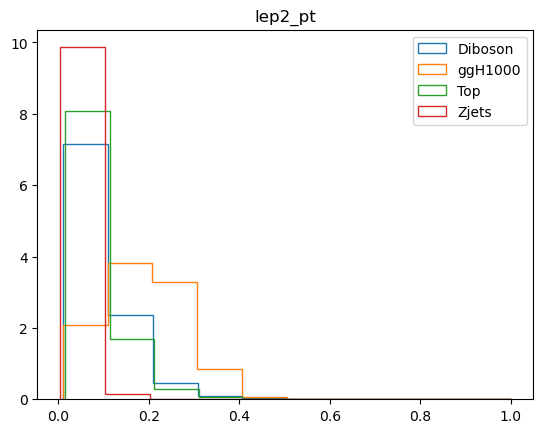

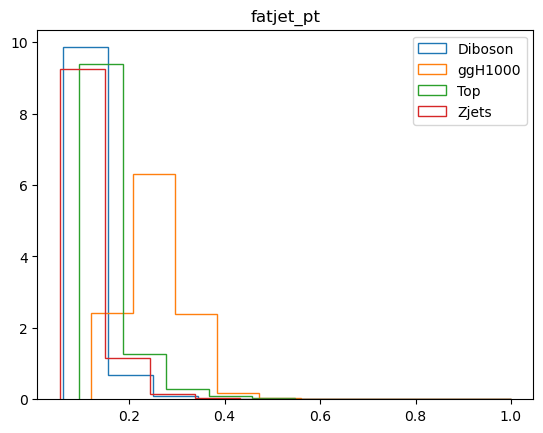

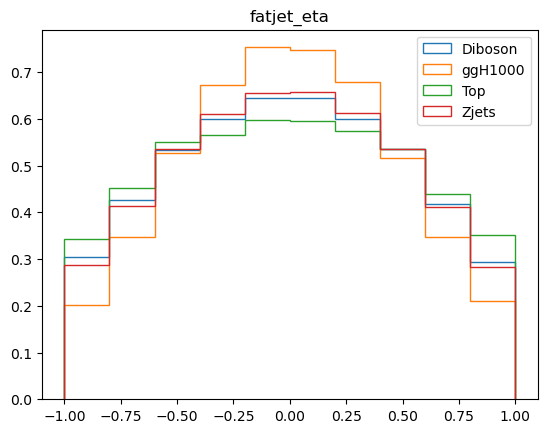

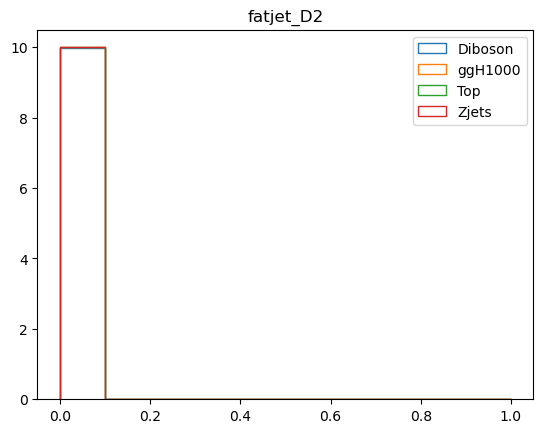

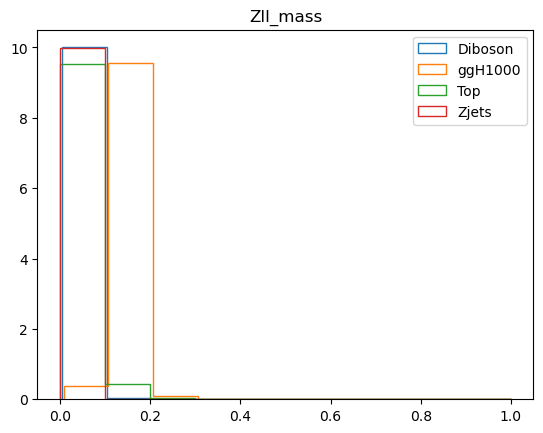

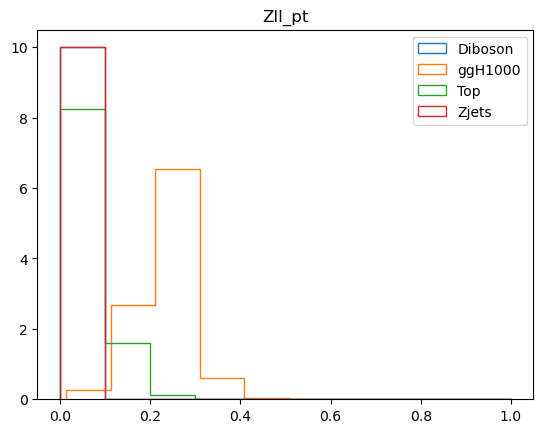

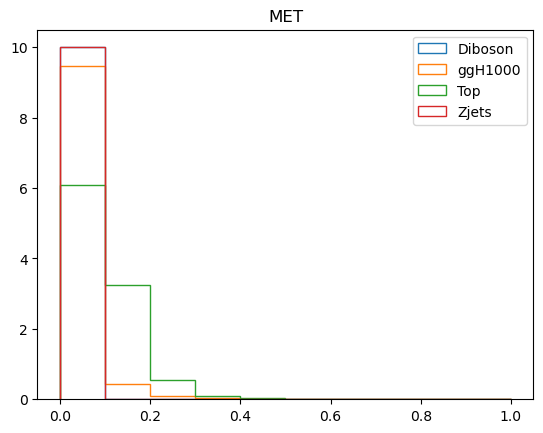

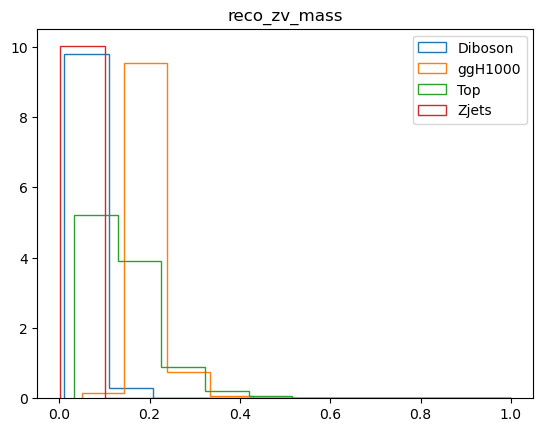

In [12]:
columns = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass']
processes = ['Diboson', 'ggH1000', 'Top', 'Zjets']

for name in columns:
    plt.figure()
    plt.hist(dibos_scaled[name], density=True, histtype='step', stacked=True)
    plt.hist(ggH1000_scaled[name], density=True, histtype='step', stacked=True)
    plt.hist(top_scaled[name], density=True, histtype='step', stacked=True)
    plt.hist(zjets_scaled[name], density=True, histtype='step', stacked=True)
    plt.legend(processes)
    plt.title(name)
    plt.show()

## Exercise 2:

(a) Put together all background samples to produce one “mega” DataFrame with method pandas.core.frame.DataFrame.concat. You probably also want to be using the ignore index=True option. We want to shuffle the contents of the new DataFrame, as it currently contains ordered events from different background processes, which is unnatural. Use methods sklearn.utils.shuffle and DataFrame.reset index(drop=True). Make sure to run
this with a fixed random seed, as per good practice for reproducibility of your results. Create a training dataset that contains equal numbers of signal and background events. Remember that in the original dataframes the number of background events is much larger than the number of signal events. Create a 50-50 admixture sample with twice the number of signal events 4. Use the previously discussed concat and shuffle methods.

In [13]:
from sklearn.utils import shuffle

mega_df = pd.concat([dibos, ggH1000, top, zjets], ignore_index=True)
mega_shuffled = shuffle(mega_df, random_state=42)
mega_shuffled = mega_shuffled.reset_index(drop=True)

mega_shuffled.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.818380,25230.447,1,92395.24,382601.34,0.181210,2.498869,457524.10,-0.569047,-0.809519,...,-0.026854,2.485371,291108.00,106940.41,-1,-0.533923,2.257788,93319.850,802932.80,-1.0
1,0.833453,124194.016,1,212990.77,173921.73,0.053898,6.111370,1027145.44,-1.839498,0.714623,...,-0.592272,-2.039268,179675.95,124671.83,-1,-0.784781,2.345115,94157.790,683400.60,-1.0
2,0.762509,42873.098,1,94434.65,73899.71,0.068847,2.506215,444591.90,-0.882952,2.900478,...,-1.384591,-1.260787,91188.06,111901.48,-1,-2.438747,1.462155,19383.678,364308.78,-1.0
3,1.068031,22926.285,1,80867.04,442917.28,0.221964,2.695411,1620549.80,-0.831420,-0.437054,...,-1.459374,2.439795,391476.62,166929.17,-1,-1.741180,2.906883,56784.580,1547536.00,-1.0
4,1.054789,51727.027,1,89006.46,92747.02,0.066455,2.311110,565408.80,-1.292050,-0.272028,...,0.163663,2.415167,64720.33,63866.95,1,0.073411,-2.340439,63695.242,469599.44,-1.0


In [14]:
signal_set = mega_shuffled[mega_shuffled['isSignal'] == 1]
signal_set.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
112,0.072094,48883.0740,0,91551.580,252847.08,0.219200,0.943982,582189.20,-1.513272,-2.000810,...,1.003747,0.443857,226584.95,103110.900,1,1.824857,-0.222973,32408.746,1007074.75,1000000.90
165,0.067643,35353.7070,0,69136.555,203173.17,0.284365,1.324355,877137.10,1.626703,-1.627988,...,-0.570448,1.297728,148669.39,76854.830,-1,-0.567587,2.010988,65944.375,896167.80,1000004.25
213,0.070976,30257.8890,1,97937.625,526354.30,0.101181,0.925829,1422748.80,-1.690695,1.598049,...,-1.667985,-1.692877,329655.60,574770.100,1,-1.686970,-1.315023,205709.880,1052054.10,999999.40
288,0.070558,23034.0960,0,90395.260,422345.16,0.092205,0.748560,586394.70,-0.951400,0.489353,...,0.299241,-2.613275,392137.84,39622.600,1,0.132660,2.945121,39276.348,989959.25,1000001.00
345,0.093593,2505.3452,0,87724.555,307666.03,0.083966,0.727764,595755.94,1.032282,-1.559874,...,-0.520304,1.521091,252898.89,100469.445,-1,-1.163087,1.845462,57209.785,953209.44,999998.80


In [15]:
len(signal_set)

50013

In [49]:
background_set = mega_shuffled[mega_shuffled['isSignal'] == 0]
selected_background = background_set[0:len(signal_set)]
len(selected_background)

50013

In [50]:
sample_df = pd.concat([signal_set, selected_background], ignore_index=True)
sample_shuffled = shuffle(sample_df, random_state=42)
sample_shuffled = sample_shuffled.reset_index(drop=True)

sample_shuffled.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.072800,22904.7620,1,91654.480,362168.200,0.087224,0.686153,1140846.80,1.764268,0.633103,...,0.164567,-2.834902,229128.050,146286.020,1,0.158991,-2.325662,144456.380,1010374.1,999990.06
1,0.139432,55423.1100,0,99323.040,333620.440,0.138899,0.971480,502588.80,-1.161694,-0.697543,...,1.156626,2.211938,281872.720,101064.734,1,0.998796,2.941380,65555.450,1091749.6,1000009.44
2,0.775364,19673.7850,1,87784.270,20971.477,0.115650,2.738151,1032126.90,1.196255,-0.836221,...,-0.352322,0.335237,49926.957,51462.793,-1,-0.820562,3.078691,37952.460,569807.9,-1.00
3,0.061600,48636.0430,0,103155.670,454531.100,0.113736,2.135681,1006704.60,-1.873766,2.872832,...,-0.087818,-0.708243,339215.620,125588.810,-1,0.202893,-1.123320,123047.414,1084224.5,999926.94
4,0.782172,6520.7783,1,80432.555,381630.970,0.099929,1.400397,360829.03,-0.324738,-0.434958,...,2.271002,2.635732,355329.470,85395.550,-1,1.702900,-3.118692,30111.283,1409183.5,-1.00


(b) Create a new dataframe containing only the 8 input and 1 output features of interest. Make 2D scatter plots for each combination pair of the 8 input features. Choose a different colour for signal and background (do this by creating a wtype = [’Background’, ’Signal’] object with the labels of the possible N classes = 2 categories. You can either write your own code, or recycle function dt utils.featureplot that we used in a previous NN checkpoint.

In [51]:
variables = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'isSignal']
inputs = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']

df_2b = sample_shuffled[variables]

In [52]:
df_2b.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,isSignal
0,229128.050,144456.380,378626.30,1.764268,0.686153,91654.480,362168.200,22904.7620,1
1,281872.720,65555.450,281137.60,-1.161694,0.971480,99323.040,333620.440,55423.1100,1
2,49926.957,37952.460,571311.94,1.196255,2.738151,87784.270,20971.477,19673.7850,0
3,339215.620,123047.414,301825.56,-1.873766,2.135681,103155.670,454531.100,48636.0430,1
4,355329.470,30111.283,340138.22,-0.324738,1.400397,80432.555,381630.970,6520.7783,0


In [53]:
import seaborn as sns
sns.set_theme()

In [54]:
a_cols = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta']
b_cols = ['fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']

<Figure size 640x480 with 0 Axes>

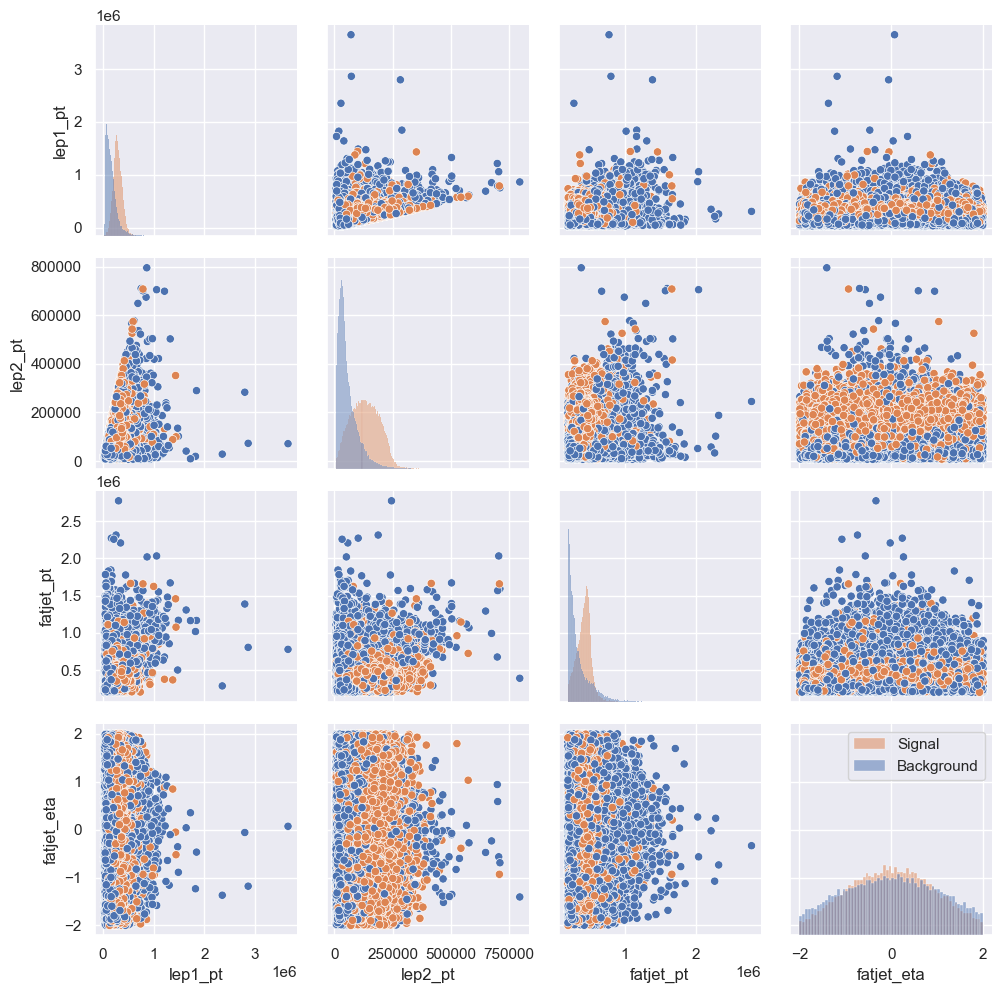

In [55]:
plt.figure()
grid_a = sns.PairGrid(df_2b, hue='isSignal', vars=a_cols)
grid_a.map_offdiag(sns.scatterplot)
grid_a.map_diag(sns.histplot)
plt.legend(['Signal', 'Background'])
plt.show()

<Figure size 640x480 with 0 Axes>

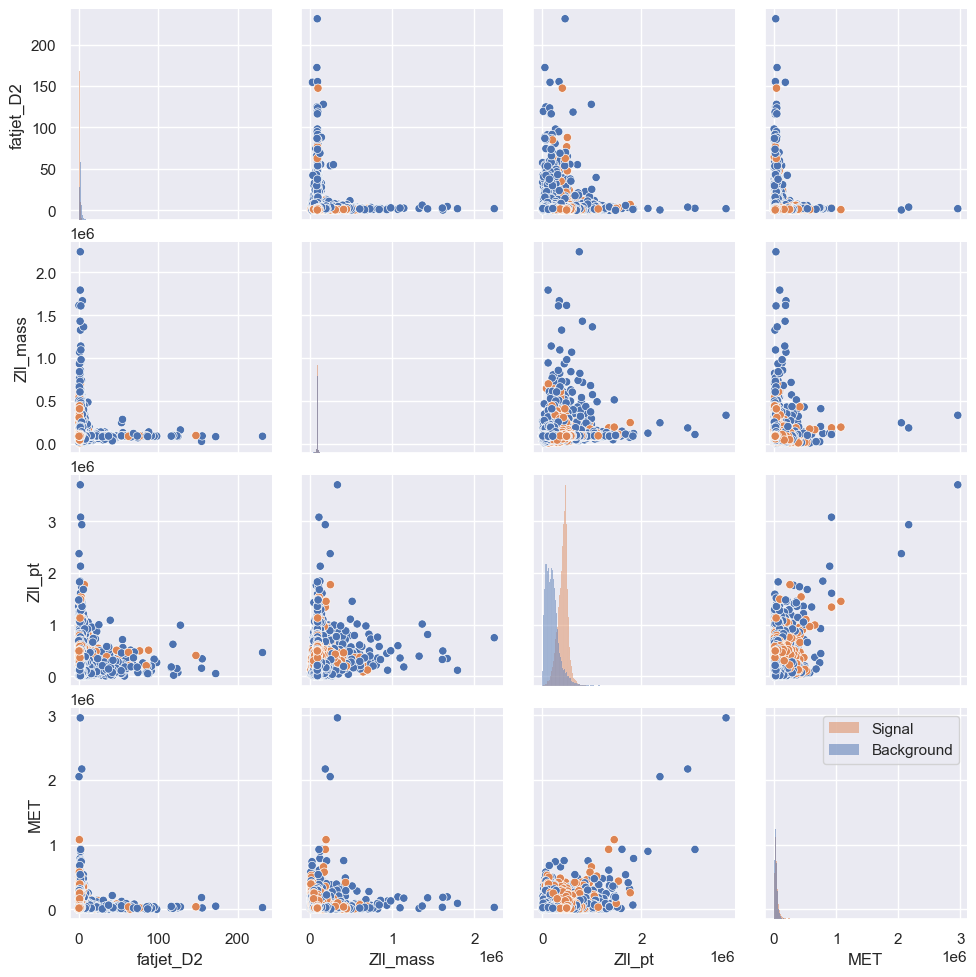

In [56]:
plt.figure()
grid_b = sns.PairGrid(df_2b, hue='isSignal', vars=b_cols)
grid_b.map_offdiag(sns.scatterplot)
grid_b.map_diag(sns.histplot)
plt.legend(['Signal', 'Background'])
plt.show()

## Exercise 3:

We start by performing input-feature scaling. We then split the dataset into training (70%) and test (30%) subsets:

In [57]:
from sklearn import model_selection, preprocessing

input_df = df_2b[inputs]
target_data = df_2b['isSignal']

sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(input_df)

#set random seed
answer_to_everything = 42

#train-test-split the dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(\
                                                                                    input_data, target_data, test_size=0.3, \
                                                                                    random_state=answer_to_everything)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(70018, 8) (70018,) (30008, 8) (30008,)


## Exercise 4:

(a) Write a function that can create flexible NN models.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models

In [141]:
def my_model(num_inputs, num_nodes, extra_depth):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal',\
                    activation='relu'))
    model.add(Dropout(0.2))
    
    for i in range(extra_depth):
        model.add(Dense(num_nodes, kernel_initializer='normal'))
    
    model.add(Dense(1, kernel_initializer='normal'))       
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

Try running the NN with a batch size of 500, 50 epochs, 20 nodes per layer, and extra_depth=1 as a starting point. Put the result of the fit method call into a history object:

In [126]:
model = my_model(8, 20, 1)

history = model.fit(train_data, train_target, batch_size=500, epochs=50, verbose=1, \
                    validation_data=(test_data, test_target))

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 1.1040 - accuracy: 0.5714 - val_loss: 0.6135 - val_accuracy: 0.8252
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8392 - val_loss: 0.5391 - val_accuracy: 0.8641
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8533 - val_loss: 0.4568 - val_accuracy: 0.8459
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8532 - val_loss: 0.4524 - val_accuracy: 0.8650
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8526 - val_loss: 0.4267 - val_accuracy: 0.8617
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8566 - val_loss: 0.4303 - val_accuracy: 0.8731
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8598 - val_loss: 0.4108 - val_accuracy: 0.8609
Epoch 

(b) When the classification converges, use arrays History.history[’loss’] and History.history[’val accuracy’] to plot the evolution of the loss-function (y-axis in log-scale) and the NN accuracy on the validation sample (y-axis in linear-scale) as a function of the epoch. You may use functions nn utils.lossplot and nn utils.accplot or write your own.

In [127]:
epochs = np.arange(50)
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']

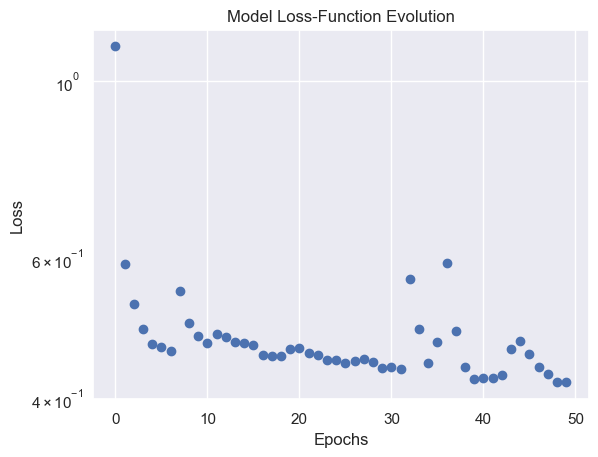

In [128]:
plt.figure()
plt.scatter(epochs, loss)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss-Function Evolution')
plt.yscale('log')
plt.show()

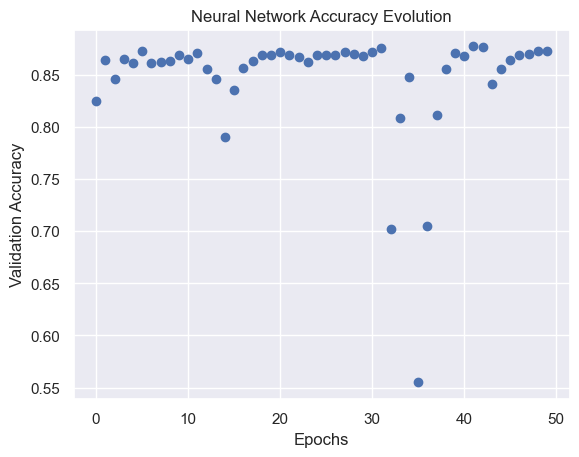

In [129]:
plt.figure()
plt.scatter(epochs, val_accuracy)
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Neural Network Accuracy Evolution')
plt.show()

## Exercise 5:

Having to find the best architecture by varying the numbers of layers and nodes, or the batch size and number of epochs is quite tedious. We will implement a callback hook that can automate the procedure for us, and exit the optimisation when the classification converges:

In [130]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [131]:
callbacks_ = [
    # if we don't have an increase of the accuracy for 10 epochs, terminate training
    EarlyStopping(verbose=True, patience=10, monitor='val_accuracy'),
    # always make sure that we're saving the model weights with the best accuracy
    ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
]

history = model.fit(train_data, train_target, batch_size=500, epochs=50, verbose=1,\
                    validation_data=(test_data, test_target), callbacks=callbacks_)

Epoch 1/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8554 - val_loss: 0.3813 - val_accuracy: 0.8750
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8589 - val_loss: 0.3784 - val_accuracy: 0.8768
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8633 - val_loss: 0.3794 - val_accuracy: 0.8788
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6294 - val_loss: 0.6237 - val_accuracy: 0.5199
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.5961 - val_loss: 0.5289 - val_accuracy: 0.6535
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7155 - val_loss: 0.4527 - val_accuracy: 0.8020
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.8001 - val_loss: 0.4106 - val_accuracy: 0.8572
Epoch 

Try using this new method after you expand the set of input features to also include variable reco zv mass. Feel free to experiment with the architecture parameters. The goal is to achieve an accuracy (val accuracy) of 95%. Plot the loss-function and NN-accuracy as a function of the epoch for the best classification method.

### Model 2

Using the original model, but including the variable 'reco_zv_mass' in the inputs.

In [132]:
# adding reco_zv_mass to input features
new_cols = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass', 'isSignal']
new_inputs = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass']

input_df_2 = sample_shuffled[new_inputs]
target_data = df_2b['isSignal']

sc = preprocessing.StandardScaler()
input_data_2 = sc.fit_transform(input_df_2)

#set random seed
answer_to_everything = 42

#train-test-split the dataset
train_data_2, test_data_2, train_target_2, test_target_2 = model_selection.train_test_split(\
                                                                                            input_data_2, target_data, test_size=0.3, \
                                                                                            random_state=answer_to_everything)
print(train_data_2.shape, train_target_2.shape, test_data_2.shape, test_target_2.shape)

(70018, 9) (70018,) (30008, 9) (30008,)


In [133]:
model_2 = my_model(9, 20, 1)

history_2 = model_2.fit(train_data_2, train_target_2, batch_size=500, epochs=50, verbose=1, \
                        validation_data=(test_data_2, test_target_2))

Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 1.2434 - accuracy: 0.5214 - val_loss: 0.6222 - val_accuracy: 0.7103
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7928 - val_loss: 0.5256 - val_accuracy: 0.8597
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8227 - val_loss: 0.4519 - val_accuracy: 0.8542
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8410 - val_loss: 0.4502 - val_accuracy: 0.8826
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.8578 - val_loss: 0.4132 - val_accuracy: 0.8794
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7320 - val_loss: 0.4583 - val_accuracy: 0.7943
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7734 - val_loss: 0.4330 - val_accuracy: 0.8333
Epoch 

In [165]:
max(history_2.history['val_accuracy'])

0.9262530207633972

### Model 3

Model 2, but adding the callback condition.

In [134]:
history_3 = model_2.fit(train_data_2, train_target_2, batch_size=500, epochs=50, verbose=1,\
                        validation_data=(test_data_2, test_target_2), callbacks=callbacks_)

Epoch 1/50
141/141 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.9007 - val_loss: 0.2763 - val_accuracy: 0.9241
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8669 - val_loss: 0.4562 - val_accuracy: 0.7811
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8465 - val_loss: 0.3184 - val_accuracy: 0.9061
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8923 - val_loss: 0.2939 - val_accuracy: 0.9173
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8997 - val_loss: 0.2857 - val_accuracy: 0.9192
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.9025 - val_loss: 0.2824 - val_accuracy: 0.9208
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.9045 - val_loss: 0.2828 - val_accuracy: 0.9216
Epoch 

In [166]:
max(history_3.history['val_accuracy'])

0.925753116607666

### Model 4

Changing the model architecture by increasing the number of layers

In [135]:
model_4 = my_model(9, 20, 3)

history_4 = model_4.fit(train_data_2, train_target_2, batch_size=500, epochs=50, verbose=1, \
                        validation_data=(test_data_2, test_target_2))

Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 1.3357 - accuracy: 0.5780 - val_loss: 0.6264 - val_accuracy: 0.8064
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.8409 - val_loss: 0.5212 - val_accuracy: 0.8738
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.8647 - val_loss: 0.4247 - val_accuracy: 0.8730
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8777 - val_loss: 0.3972 - val_accuracy: 0.8833
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8726 - val_loss: 0.3737 - val_accuracy: 0.8924
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8851 - val_loss: 0.3597 - val_accuracy: 0.8961
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8419 - val_loss: 0.3442 - val_accuracy: 0.8928
Epoch 

In [167]:
max(history_4.history['val_accuracy'])

0.9279525279998779

### Model 5

Adding more layers and increasing the number of nodes to 30.

In [136]:
model_5 = my_model(9, 30, 5)

history_5 = model_5.fit(train_data_2, train_target_2, batch_size=500, epochs=50, verbose=1, \
                        validation_data=(test_data_2, test_target_2))

Epoch 1/50
141/141 [==============================] - 2s 10ms/step - loss: 0.9719 - accuracy: 0.7026 - val_loss: 0.4099 - val_accuracy: 0.8270
Epoch 2/50
141/141 [==============================] - 1s 8ms/step - loss: 0.4193 - accuracy: 0.8778 - val_loss: 0.3261 - val_accuracy: 0.9109
Epoch 3/50
141/141 [==============================] - 1s 8ms/step - loss: 0.3674 - accuracy: 0.8995 - val_loss: 0.3230 - val_accuracy: 0.9138
Epoch 4/50
141/141 [==============================] - 1s 8ms/step - loss: 0.3856 - accuracy: 0.8671 - val_loss: 0.3005 - val_accuracy: 0.9186
Epoch 5/50
141/141 [==============================] - 1s 8ms/step - loss: 0.3473 - accuracy: 0.9107 - val_loss: 0.2868 - val_accuracy: 0.9255
Epoch 6/50
141/141 [==============================] - 1s 8ms/step - loss: 0.3364 - accuracy: 0.9120 - val_loss: 0.8388 - val_accuracy: 0.4996
Epoch 7/50
141/141 [==============================] - 1s 8ms/step - loss: 0.7713 - accuracy: 0.6905 - val_loss: 0.3634 - val_accuracy: 0.9086
Epoch

In [168]:
max(history_5.history['val_accuracy'])

0.9272193908691406

This model performed similar to the last. 

### Looping through value combinations with the callback

In [160]:
batch_sizes = [100, 500]
epoch_nums = [50, 75]
nodes = [10, 15, 20]
layers = [3, 4, 5]

Note: the cell below takes about 30 minutes to run 

In [161]:
batches = []
epoch_vals = []
node_nums = []
layer_amt = []
best_val_accuracy = []

for size in batch_sizes:
    for val in epoch_nums:
        for num in nodes:
            for amt in layers:
                test_model = my_model(8, num, amt)
                
                history = test_model.fit(train_data, train_target, batch_size=size, epochs=val, verbose=0, \
                                         validation_data=(test_data, test_target), callbacks=callbacks_)
                batches.append(size)
                epoch_vals.append(val)
                node_nums.append(num)
                layer_amt.append(amt)
                best_val_accuracy.append(max(history.history['val_accuracy']))

Epoch 15: early stopping
Epoch 32: early stopping
Epoch 24: early stopping
Epoch 19: early stopping
Epoch 45: early stopping
Epoch 37: early stopping
Epoch 26: early stopping
Epoch 32: early stopping
Epoch 20: early stopping
Epoch 18: early stopping
Epoch 19: early stopping
Epoch 26: early stopping
Epoch 28: early stopping
Epoch 35: early stopping
Epoch 28: early stopping
Epoch 24: early stopping
Epoch 38: early stopping
Epoch 16: early stopping
Epoch 23: early stopping
Epoch 22: early stopping
Epoch 41: early stopping
Epoch 21: early stopping
Epoch 50: early stopping
Epoch 47: early stopping
Epoch 30: early stopping
Epoch 28: early stopping
Epoch 34: early stopping
Epoch 28: early stopping
Epoch 47: early stopping
Epoch 30: early stopping
Epoch 26: early stopping
Epoch 24: early stopping
Epoch 41: early stopping
Epoch 48: early stopping
Epoch 45: early stopping
Epoch 17: early stopping


In [162]:
max(best_val_accuracy)

0.8882631063461304

In [163]:
accuracy_df = pd.DataFrame({'batch_size': batches,
                            'epochs': epoch_vals,
                            'nodes': node_nums,
                            'layers': layer_amt,
                            'val_accuracy': best_val_accuracy
                           })

accuracy_sorted = accuracy_df.sort_values(by='val_accuracy')
accuracy_sorted.tail()

,batch_size,epochs,nodes,layers,val_accuracy
6,100,50,20,3,0.887330
33,500,75,20,3,0.887463
25,500,50,20,4,0.887563
17,100,75,20,5,0.888196
15,100,75,20,3,0.888263


In [88]:
best_model = my_model(8, 10, 5)
                
history_best = best_model.fit(train_data, train_target, batch_size=1000, epochs=50, verbose=1, \
                              validation_data=(test_data, test_target)) #callbacks=callbacks_)

Epoch 1/50
71/71 [==============================] - 1s 5ms/step - loss: 3.7761 - accuracy: 0.0761 - val_loss: 2.1817 - val_accuracy: 0.0821
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 2.9538 - accuracy: 0.1397 - val_loss: 1.6242 - val_accuracy: 0.1399
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 2.6629 - accuracy: 0.1919 - val_loss: 1.3938 - val_accuracy: 0.2063
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: 2.5172 - accuracy: 0.2451 - val_loss: 1.2576 - val_accuracy: 0.2159
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 2.4165 - accuracy: 0.2585 - val_loss: 1.1407 - val_accuracy: 0.2337
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 2.3427 - accuracy: 0.2917 - val_loss: 1.0668 - val_accuracy: 0.3180
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 2.2894 - accuracy: 0.2997 - val_loss: 1.0073 - val_accuracy: 0.1622
Epoch 8/50
71/71 [==

In [170]:
best_model = model_4

history_7 = best_model.fit(train_data_2, train_target_2, batch_size=250, epochs=75, verbose=1, \
                           validation_data=(test_data_2, test_target_2), callbacks=callbacks_)

Epoch 1/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9125 - val_loss: 0.2722 - val_accuracy: 0.9251
Epoch 2/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.9129 - val_loss: 0.2681 - val_accuracy: 0.9274
Epoch 3/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.9080 - val_loss: 0.3122 - val_accuracy: 0.9290
Epoch 4/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.9156 - val_loss: 0.2633 - val_accuracy: 0.9267
Epoch 5/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.9091 - val_loss: 0.2764 - val_accuracy: 0.9174
Epoch 6/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.9088 - val_loss: 0.2696 - val_accuracy: 0.9205
Epoch 7/75
281/281 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.9062 - val_loss: 0.2736 - val_accuracy: 0.9202
Epoch 

In [171]:
loss_test = history_7.history['loss']
val_accuracy_test = history_7.history['val_accuracy']
epochs_test = np.arange(len(loss_test))

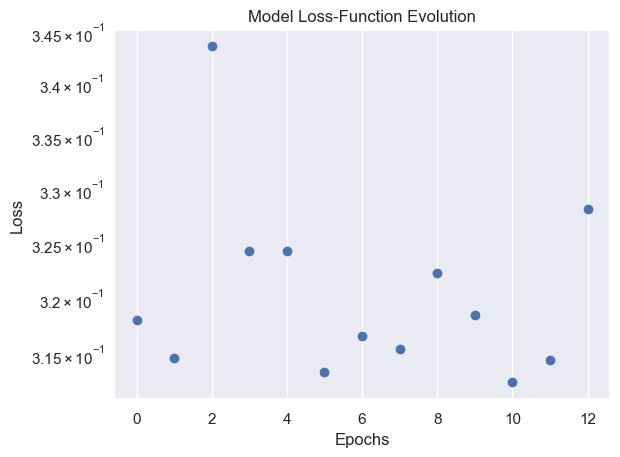

In [172]:
plt.figure()
plt.scatter(epochs_test, loss_test)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss-Function Evolution')
plt.yscale('log')
plt.show()

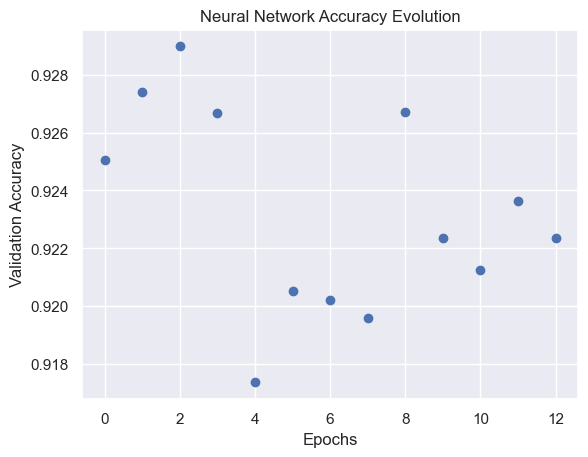

In [173]:
plt.figure()
plt.scatter(epochs_test, val_accuracy_test)
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Neural Network Accuracy Evolution')
plt.show()

## Exercise 6:

We will now try to visualise the results of the NN classifier. Use method keras.models.Model.predict to get the predicted categories for
test data. Notice that the output is not binary, but corresponds to a probability. Use a simple model (e.g. predicted = (predict test target >0.5)) to turn the output into a binary decision. Use sklearn.metrics.confusion matrix and nn utils.heatmap to plot the “confusion matrix” on a 2 × 2 grid.

In [175]:
predicted = best_model.predict(train_data_2)

2189/2189 [==============================] - 2s 996us/step


In [176]:
def to_binary(input_array):
    binary_version = []
    
    for item in input_array:
        if item > 0.5:
            binary_version.append(1)
        else:
            binary_version.append(0)
    
    return binary_version

In [177]:
predicted_binary = to_binary(predicted)

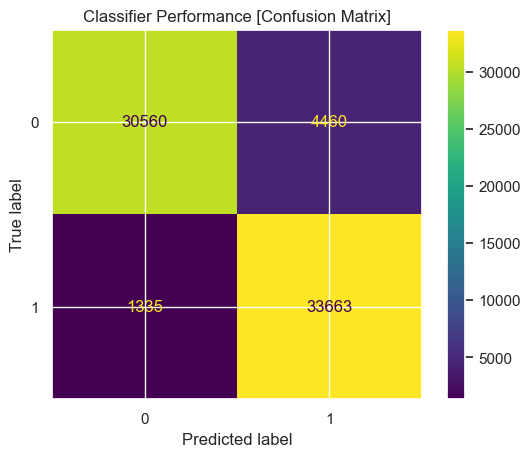

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = train_target_2
y_pred = predicted_binary

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Classifier Performance [Confusion Matrix]')
plt.show()

A more advanced way of showing the NN classifier performance is by producing a ROC curve. Use sklearn.metrics.roc curve to get the False Positive Rate (i.e. effectively: background efficiency) and True Positive Rate (i.e. effectively: signal efficiency). Plot the ROC curve. What would you say the optimal performance point is?

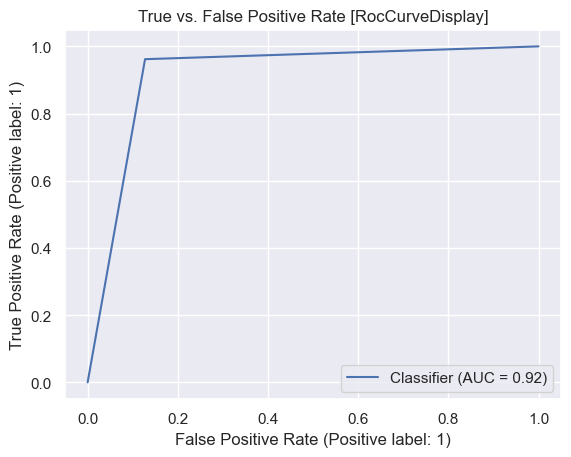

In [185]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# fpr is the False Positive Rate, tpr is the True Positive Rate
fpr, tpr, thresholds = roc_curve(y_true, predicted)

# plotting
RocCurveDisplay.from_predictions(y_true, y_pred)
plt.title('True vs. False Positive Rate [RocCurveDisplay]')
plt.show()

The optimal point is the point at which the roc curve changes slopes. At ~0.12, the rate at which false positives increase relative to true positive increases drastically increases. 

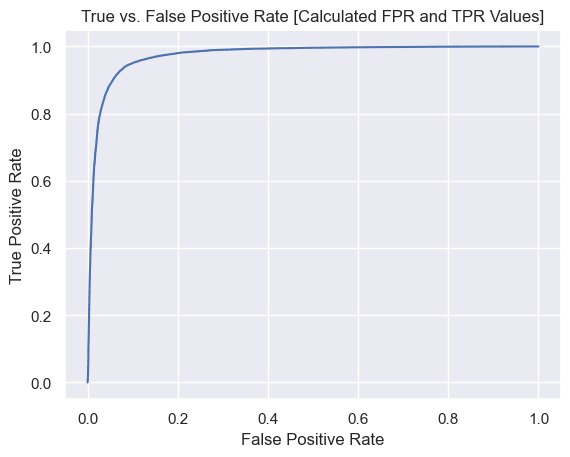

In [184]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('True vs. False Positive Rate [Calculated FPR and TPR Values]')
plt.show()